Data and Setup

In [1]:
import numpy as np
import pandas as pd

Import visulization libraries and set %matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Read in the csv file as a dataframe called df

In [4]:
df=pd.read_csv('D:\Data Science project\911.csv')
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


Check the info() of the df

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 623347 entries, 0 to 623346
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   lat        623347 non-null  float64
 1   lng        623347 non-null  float64
 2   desc       623347 non-null  object 
 3   zip        547211 non-null  float64
 4   title      623347 non-null  object 
 5   timeStamp  623347 non-null  object 
 6   twp        623079 non-null  object 
 7   addr       623347 non-null  object 
 8   e          623347 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 42.8+ MB


Baic Question

What are the top 5 zipcodes for 911 calls?

In [8]:
df['zip'].value_counts().head(5)

19401.0    42465
19464.0    40997
19403.0    32613
19446.0    30251
19406.0    21167
Name: zip, dtype: int64

What are the top 5 township(twp) for 911 calls?

In [9]:
df['twp'].value_counts().head(5)

LOWER MERION    52541
ABINGTON        37551
NORRISTOWN      34954
UPPER MERION    34108
CHELTENHAM      28733
Name: twp, dtype: int64

Take a look at the 'title column how many unique title codes are there?'

In [13]:
df['title'].nunique()

147

Creating new features

in the title column there are "Reasons/Department" 
specified before the title code.Theseare EMS,Fire
and Traffic Use .apply( with a coustom lamda expression
to create a new columns called 'reason' that contains this string value 
                                                                                                                            column called Reason that containsthis  this string value)

For Example if the title columns value is EMS: Back pains?injury,
    the reason columnvalue would be EMS

In [14]:
x=df['title'].iloc[0]

In [16]:
x.split(':')[0]

'EMS'

In [18]:
df['Reason']=df['title'].apply(lambda title:title.split(':')[0])

In [20]:
df['Reason']

0          EMS
1          EMS
2         Fire
3          EMS
4          EMS
          ... 
623342     EMS
623343     EMS
623344     EMS
623345     EMS
623346     EMS
Name: Reason, Length: 623347, dtype: object

What is the most common Reason for a 911 call based of this new column?

In [22]:
df['Reason'].value_counts().head()

EMS        310273
Traffic    219844
Fire        93230
Name: Reason, dtype: int64

Now use seaborn to create a countplot of 911 calls by Reason

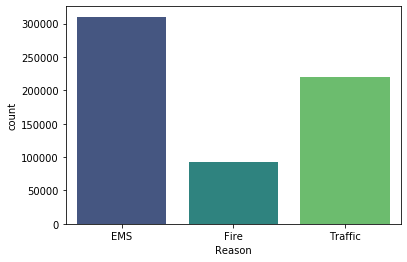

In [25]:
sns.countplot(x='Reason',data=df,palette='viridis')

Now let us begin to focus on time information what 
is the data type of the objects in the timeStamp column?

In [28]:
type(df['timeStamp'].iloc[0])

str

You should have seen that these timestamp are still string.use 
pd.to datetime to convert the column from stringto Datetime
objects?

In [29]:
df['timeStamp']=pd.to_datetime(df['timeStamp'])

In [30]:
type(df['timeStamp'].iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

you cannow grab specific attribute from a datetime object by calling
them for example

time=df['timeStamp'].iloc[0]
time.hour

You can use jupyter tab method to explore the various attributes you can call
now that the timestamp column are actually datetime Objects use.apply9 to create 3 new columns
called hour Month and Day of Week ,You will be create these column based off of the
time stamp column reference the solutions if you get stuck on this step.

In [31]:
time=df['timeStamp'].iloc[0]
time.hour

17

In [34]:
time.dayofweek

3

In [36]:
df['Hour']=df['timeStamp'].apply(lambda time:time.hour)

In [38]:
df['Month']=df['timeStamp'].apply(lambda time:time.month)
df['Day of Week']=df['timeStamp'].apply(lambda time:time.dayofweek)

In [39]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,3
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,3
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,14,12,3
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,16,12,3
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,16,12,3


Notice how the Day of Week is an integer 
0-6 use the .map() with this dictionary to
map the actual string names to the day of the week
dmap={0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'sun'}

In [41]:
dmap={0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'sun'}

In [42]:
df['Day of Week']=df['Day of Week'].map(dmap)

In [43]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,14,12,Thu
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,16,12,Thu
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,16,12,Thu


Now use seaborn to create a countplot of the Day of week 
column with the hue based off of the Reason column


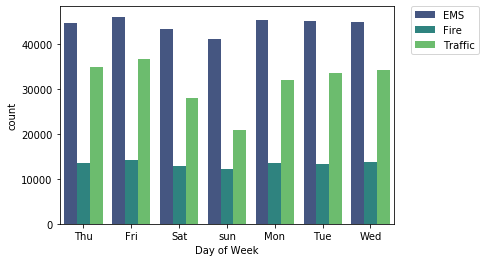

In [47]:
sns.countplot(x='Day of Week',data=df,hue='Reason',palette='viridis')
#to replicate the legend
plt.legend(bbox_to_anchor=(1.05,1),loc=2,borderaxespad=0.)

Now the same for month:

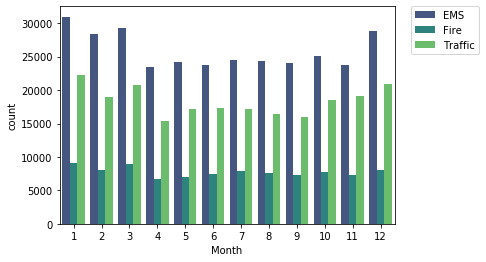

In [48]:
sns.countplot(x='Month',data=df,hue='Reason',palette='viridis')
#to replicate the legend
plt.legend(bbox_to_anchor=(1.05,1),loc=2,borderaxespad=0.)

Did you Notice something strange about the plot?

you should have noticed it was missing some month let 
see if we can maybe fill in this information by plotting
the information in another way possibly way a simple line
plotthat fills in the missing months in order to do this 
we will need to do some work with pandas


Now create a group by object called bymonth where you group 
the DataFrame by the month column and use the count( ) method
for aggregation use the head() method on this returned DataFrame

In [49]:
byMonth=df.groupby('Month').count()

In [50]:
byMonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of Week
Month,,,,,,,,,,,,
1,62336,62336,62336,55294,62336,62336,62312,62336,62336,62336,62336,62336
2,55427,55427,55427,48922,55427,55427,55405,55427,55427,55427,55427,55427
3,58939,58939,58939,52248,58939,58939,58914,58939,58939,58939,58939,58939
4,45428,45428,45428,39810,45428,45428,45414,45428,45428,45428,45428,45428
5,48467,48467,48467,42257,48467,48467,48443,48467,48467,48467,48467,48467


Now create a simple plot off of the
DateFrame indicating the count of calls
per month

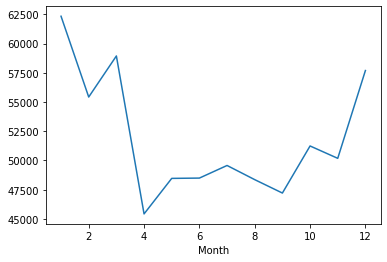

In [51]:
byMonth['lat'].plot()

No handles with labels found to put in legend.


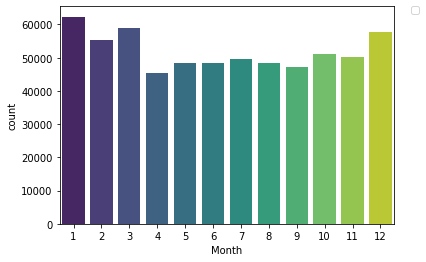

In [52]:
sns.countplot(x='Month',data=df,palette='viridis')
#to replicate the legend
plt.legend(bbox_to_anchor=(1.05,1),loc=2,borderaxespad=0.)

Now see if you can use seaborn's Implot() to 
create a linear fit on the number of calls per
month keep in mind you may need to reset the index
to a column

In [53]:
byMonth.reset_index()

,Month,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of Week
0,1,62336,62336,62336,55294,62336,62336,62312,62336,62336,62336,62336,62336
1,2,55427,55427,55427,48922,55427,55427,55405,55427,55427,55427,55427,55427
2,3,58939,58939,58939,52248,58939,58939,58914,58939,58939,58939,58939,58939
3,4,45428,45428,45428,39810,45428,45428,45414,45428,45428,45428,45428,45428
4,5,48467,48467,48467,42257,48467,48467,48443,48467,48467,48467,48467,48467
5,6,48493,48493,48493,42223,48493,48493,48466,48493,48493,48493,48493,48493
6,7,49571,49571,49571,43405,49571,49571,49550,49571,49571,49571,49571,49571
7,8,48359,48359,48359,42311,48359,48359,48335,48359,48359,48359,48359,48359
8,9,47213,47213,47213,41289,47213,47213,47196,47213,47213,47213,47213,47213
9,10,51240,51240,51240,44582,51240,51240,51220,51240,51240,51240,51240,51240


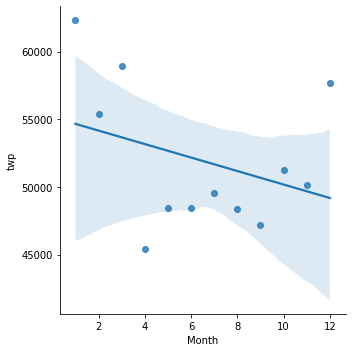

In [54]:
sns.lmplot(x='Month',y='twp',data=byMonth.reset_index())

Create a new column called date that contains the date from the timestamp column
you will need to use apply along with the .Date() method

In [55]:
t=df['timeStamp'].iloc[0]

In [56]:
df['Date']=df['timeStamp'].apply(lambda t:t.date())

In [57]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,14,12,Thu,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,16,12,Thu,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,16,12,Thu,2015-12-10


Now gropby this Date column with the count() 
aggregate and create a plot of counts of 911 calls

In [58]:
df.groupby('Date').count().head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week
Date,,,,,,,,,,,,,
2015-12-10,114,114,114,100,114,114,114,114,114,114,114,114,114
2015-12-11,391,391,391,332,391,391,391,391,391,391,391,391,391
2015-12-12,402,402,402,334,402,402,402,402,402,402,402,402,402
2015-12-13,316,316,316,279,316,316,316,316,316,316,316,316,316
2015-12-14,444,444,444,386,444,444,443,444,444,444,444,444,444


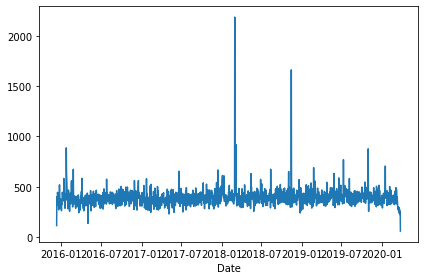

In [62]:
df.groupby('Date').count()['lat'].plot()
plt.tight_layout()

Now recreate this plot but create 3 seperate plots with each plot
representing a Reason for the (911 call)

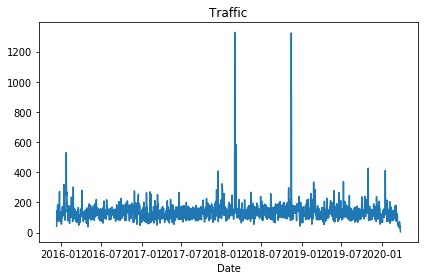

In [64]:
df[df['Reason']=='Traffic'].groupby('Date').count()['lat'].plot()
plt.title('Traffic')
plt.tight_layout()

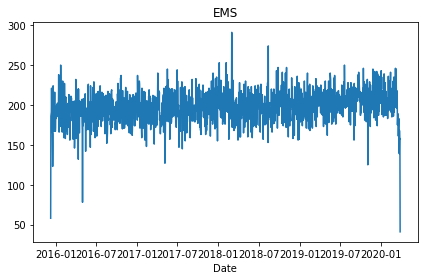

In [65]:
df[df['Reason']=='EMS'].groupby('Date').count()['lat'].plot()
plt.title('EMS')
plt.tight_layout()

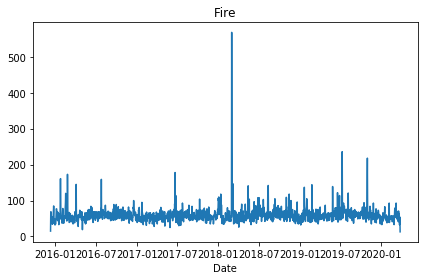

In [67]:
df[df['Reason']=='Fire'].groupby('Date').count()['lat'].plot()
plt.title('Fire')
plt.tight_layout()

Now let's move on to creating heatmaps with seaborn and our data
we will first need torestructure the dataframe so that the columns
become the hours and the inbox becomesthe day of week there are lots
of way to do this but i would recommend trying to combine groupby 
with an unstack method.Reference thesolutions if you get stuck on this

In [69]:
df.groupby(by=['Day of Week','Hour']).count()

lat   lng  desc   zip  title  timeStamp   twp  addr     e  \
Day of Week Hour                                                               
Fri         0     1850  1850  1850  1631   1850       1850  1848  1850  1850   
            1     1519  1519  1519  1348   1519       1519  1516  1519  1519   
            2     1356  1356  1356  1227   1356       1356  1356  1356  1356   
            3     1231  1231  1231  1110   1231       1231  1231  1231  1231   
            4     1228  1228  1228  1133   1228       1228  1227  1228  1228   
...                ...   ...   ...   ...    ...        ...   ...   ...   ...   
sun         19    3911  3911  3911  3426   3911       3911  3909  3911  3911   
            20    3495  3495  3495  3076   3495       3495  3494  3495  3495   
            21    2935  2935  2935  2612   2935       2935  2935  2935  2935   
            22    2441  2441  2441  2155   2441       2441  2440  2441  2441   
            23    2172  2172  2172  1858   2172       2172  2170  2172  2172   

                  Reason  Month  Date  
Day of Week Hour                       
Fri         0       1850   1850  1850  
            1       1519   1519  1519  
            2       1356   1356  1356  
            3       1231   1231  1231  
            4       1228   1228  1228  
...                  ...    ...   ...  
sun         19      3911   3911  3911  
            20      3495   3495  3495  
            21      2935   2935  2935  
            22      2441   2441  2441  
            23      2172   2172  2172  

[168 rows x 12 columns]

In [71]:
dayHour=df.groupby(by=['Day of Week','Hour']).count()['Reason'].unstack()

Now Create a HeapMap using this new dataFrame

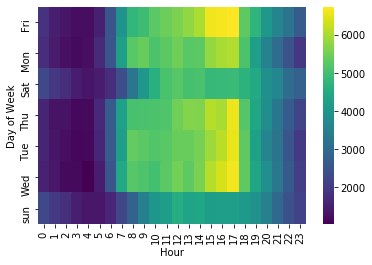

In [75]:
plt.Figure(figsize=(12,6))
sns.heatmap(dayHour,cmap='viridis')

Now create a clustermap using This DataFrame

<Figure size 864x432 with 0 Axes>

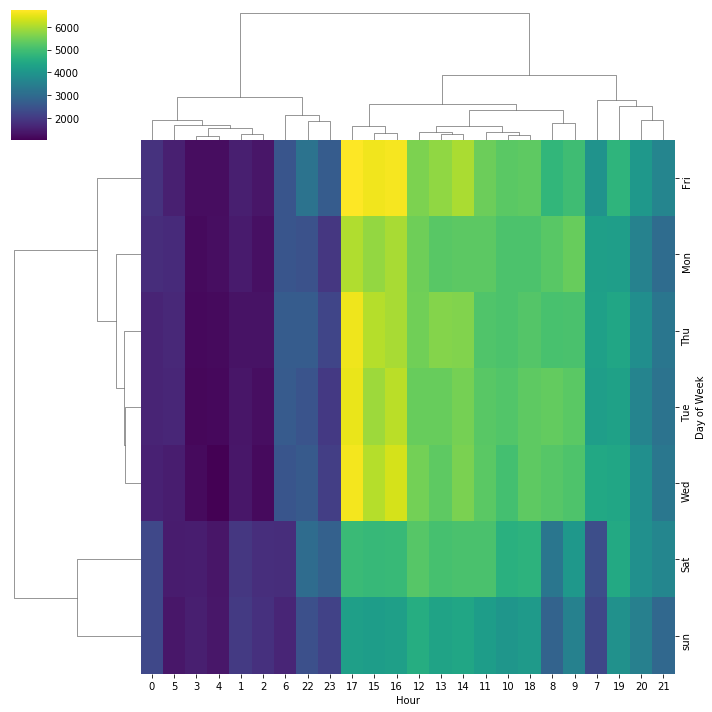

In [77]:
plt.figure(figsize=(12,6))
sns.clustermap(dayHour,cmap='viridis')

Now Repeat this same plots and
operations for a DataFrame that shows the
Month as the column

In [81]:
dayMonth=df.groupby(by=['Day of Week','Month']).count()['Reason'].unstack()
dayMonth.head()

Month,1,2,3,4,5,6,7,8,9,10,11,12
Day of Week,,,,,,,,,,,,
Fri,9309,8255,10740,6922,7214,7647,7103,7336,7694,6934,8379,9305
Mon,8896,8747,7804,7170,6746,6740,7929,6854,6598,8075,6722,8492
Sat,8475,7593,7866,6530,5796,6839,6395,6111,6566,6609,6773,8592
Thu,9055,7997,8849,6147,7524,7850,6964,7508,6954,7482,8358,8151
Tue,9714,8087,8129,6487,7835,6689,7637,7291,6601,7948,7344,8305


<Figure size 864x432 with 0 Axes>

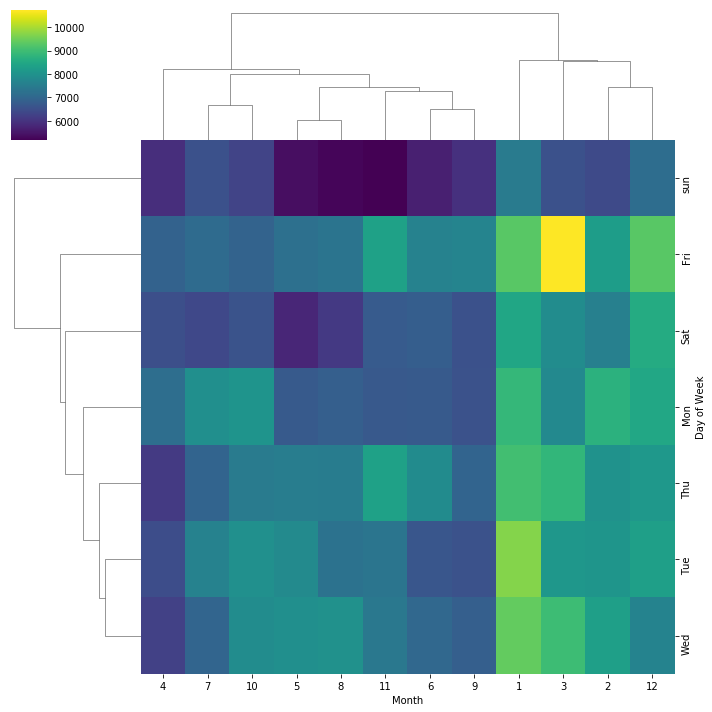

In [82]:

plt.figure(figsize=(12,6))
sns.clustermap(dayMonth,cmap='viridis')